# HM1: Logistic Regression.

### Name:Aughdon Breslin


#### For this assignment, you will build 6 models. You need to train Logistic Regression/Regularized Logistic Regression each with Batch Gradient Descent, Stochastic Gradient Descent and Mini Batch Gradient Descent. Also you should plot their objective values versus epochs and compare their training and testing accuracies. You will need to tune the parameters a little bit to obtain reasonable results.

#### You do not have to follow the following procedure. You may implement your own functions and methods, but you need to show your results and plots.

In [1]:
# Load Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 


# 1. Data processing

- Download the Breast Cancer dataset from canvas or from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
- Load the data.
- Preprocess the data.

## 1.1. Load the data

In [2]:
data = pd.read_csv('./data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Whole column is full of NaN
data['Unnamed: 32'].isna().sum()

569

## 1.2 Examine and clean data

In [4]:
# Some columns may not be useful for the model (For example, the first column contains ID number which may be irrelavant). 
# You need to get rid of the ID number feature.
del data['id']
del data['Unnamed: 32']
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Also you should transform target labels in the second column from 'B' and 'M' to 1 and -1.
data['diagnosis'] = data['diagnosis'].replace(['B','M'],[1,-1])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,-1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,-1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,-1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,-1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 1.3. Partition to training and testing sets

In [6]:
# You can partition using 80% training data and 20% testing data. It is a commonly used ratio in machinel learning.
X = data.values[:, 1:]
y = data.values[:, 0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


## 1.4. Feature scaling

Use the standardization to trainsform both training and test features

In [7]:
# Standardization

# calculate mu and sig using the training set
n,d = x_train.shape
print('n:',n)
print('d:',d)
mu = np.mean(x_train, axis=0).reshape(1, d)
sig = np.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(np.mean(x_test, axis=0))

print('test std = ')
print(np.std(x_test, axis=0))


n: 455
d: 30
test mean = 
[ 0.02090745  0.16431943  0.03098111  0.01492717 -0.01921133  0.10117201
  0.08443932  0.02966041  0.04062134  0.09494587  0.04653776  0.06428674
  0.10007498  0.00538732  0.06601984  0.11839521  0.0676146   0.1268942
  0.01037956  0.16193656  0.01337734  0.1134187   0.03390329 -0.00517026
 -0.02001553  0.07842781  0.11756424  0.01212816 -0.02700714  0.12744666]
test std = 
[0.98484027 1.15221324 0.99783436 0.91061412 1.0932457  1.2099472
 1.1161288  1.0269985  1.00338544 1.16387855 0.86929628 1.0858163
 0.95737985 0.73797557 1.25342805 1.10484161 0.84117872 1.20913453
 1.04276269 1.05856313 0.94112163 1.03290181 0.96071251 0.84629366
 1.04566915 1.12995399 1.20449902 1.03206998 0.90827971 1.06240744]


# 2.  Logistic Regression Model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

When $\lambda = 0$, the model is a regular logistric regression and when $\lambda > 0$, it essentially becomes a regularized logistric regression.

In [8]:
# Calculate the objective function value, or loss
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     objective function value, or loss (scalar)
def objective(w, x, y, lam):
    total = 0
    #     sum 1 to n
    for i in range(len(y)):
        #             ln(1+e^(-(-1 or 1)*(1-by-d)*(d-by-1)))
        total += np.log(1+np.exp(-y[i]*np.matmul(np.transpose(x[i]),w)))
    # 1/n*
    total /= len(y)
    # + lambda/2*||w||_2^2
    total += (lam/2)*(np.linalg.norm(w,2)**2)
    return total

# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ for regularized logistic regression is  $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [9]:
# Calculate the gradient
# Inputs:
#     w: weight: d-by-1 matrix
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: regularization parameter: scalar
# Return:
#     g: gradient: d-by-1 matrix

def gradient(w, x, y, lam):
    gradAtW = 0
    # sum i to n
    for i in range(len(y)):
        #          y[i]x[i]/(1+exp(y[i](x[i]^T)w)
        gradAtW += y[i]*np.array(x[i])/(1+np.exp(y[i]*np.matmul(np.transpose(x[i]),w)))
    # -1/n*
    gradAtW /= -len(y)
    # + lambda*w
    gradAtW += lam*np.array(w)
    return gradAtW

In [10]:
# Gradient descent for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value

def gradient_descent(x, y, lam, learning_rate, w, max_epoch=100):
    objvals = []
    for i in range(max_epoch):
        grad = gradient(w,x,y,lam)
        w = w - learning_rate*grad
        objvals.append(objective(w, x, y, lam))
    return w, objvals
    

Use gradient_descent function to obtain your optimal weights and a list of objective values over each epoch.

In [11]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
# start with equivalent weights across every feature
w = [1/len(x_train[0])] * len(x_train[0])
optWeightsG, objListG = gradient_descent(x_train, y_train, 0, 0.01, w)
print("Optimal Weights:", optWeightsG)
print()
print("Objective Values:", objListG)

Optimal Weights: [-0.14557392 -0.08553148 -0.14815275 -0.13892117 -0.06118345 -0.1126143
 -0.13519603 -0.16133742 -0.05421138  0.04497547 -0.11132205  0.02507147
 -0.10538446 -0.09953842  0.04794852 -0.0211182   0.00038428 -0.05111398
  0.02964078  0.032614   -0.16088395 -0.09986907 -0.16102357 -0.14765086
 -0.08472199 -0.11511386 -0.12817047 -0.16687846 -0.08380478 -0.04780792]

Objective Values: [0.9231988025677454, 0.8902827502124717, 0.859102109693234, 0.8296301404601011, 0.8018296159510284, 0.7756530289275281, 0.7510432194579952, 0.7279344653483205, 0.7062540110741883, 0.6859239336944855, 0.6668631796657779, 0.6489895798196352, 0.6322216692941516, 0.6164801932388766, 0.6016892451507545, 0.587777042340636, 0.5746763815196243, 0.5623248358339419, 0.5506647575836952, 0.5396431445432044, 0.5292114174492809, 0.5193251452238982, 0.5099437446218023, 0.5010301729164941, 0.4925506260171913, 0.4844742498188584, 0.47677286931209867, 0.4694207377110809, 0.46239430633295053, 0.4556720149728027

In [12]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = [1/len(x_train[0])] * len(x_train[0])
optWeightsRG, objListRG = gradient_descent(x_train, y_train, 1, 0.01, w)
print("Optimal Weights:", optWeightsRG)
print()
print("Objective Values:", objListRG)

Optimal Weights: [-0.10256293 -0.06216911 -0.10395894 -0.09767916 -0.04526642 -0.07787667
 -0.09262274 -0.1102918  -0.04053012  0.02414954 -0.07748494  0.01055564
 -0.07361676 -0.07044103  0.02601952 -0.01838699 -0.00529712 -0.03847013
  0.01366675  0.01626286 -0.11209119 -0.07166607 -0.11195825 -0.10300223
 -0.06118114 -0.08081467 -0.08925162 -0.11480412 -0.06135565 -0.03679574]

Objective Values: [0.9337031828273429, 0.8957335374096531, 0.8605131554716192, 0.8279202348780442, 0.7978234145601023, 0.7700832782221895, 0.7445543653944723, 0.7210876172111748, 0.6995330889067501, 0.6797426889337838, 0.6615726894637477, 0.6448858021150483, 0.6295527035888147, 0.61545299289606, 0.6024756367717088, 0.5905190014700603, 0.5794905807165575, 0.5693065211985947, 0.5598910288779736, 0.551175718995031, 0.5430989540374956, 0.535605198841682, 0.5286444106073451, 0.5221714734864235, 0.5161456818768131, 0.510530272955674, 0.5052920067683588, 0.50040079092014, 0.4958293462828356, 0.49155290990329326, 0.4

## 3.2. Stochastic gradient descent (SGD)

Define new objective function $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $. 

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [13]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: 1-by-d matrix
#     yi: label: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def stochastic_objective_gradient(w, xi, yi, lam):
    # log(1+exp(-yi*(xi^T)*w)) + lambda/2*w**2
    obj = np.log(1+np.exp(-yi*np.matmul(np.transpose(xi),w))) + lam/2*(np.linalg.norm(w,2)**2)
    # -yi*xi/(1+exp(yi*(xi^T)*w)) + lambda*w
    g = -yi*np.array(xi)/(1+np.exp(yi*np.matmul(np.transpose(xi),w))) + lam*np.array(w)
    return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples.
2. Each epoch has $n$ iterations. In every iteration, use 1 sample, and compute the gradient and objective using the ``stochastic_objective_gradient`` function. In the next iteration, use the next sample, and so on.

In [14]:
# SGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def sgd(x, y, lam, learning_rate, w, max_epoch=100):
    '''
    n = len(x/2): n samples will be half of the total samples
    '''
    objvals = []
    for i in range(max_epoch):
        combined = np.c_[y,x]
        combined = np.random.permutation(combined)
        x = combined[:, 1:]
        y = combined[:, 0]
        for j in range(len(x/2)):
            obj, g = stochastic_objective_gradient(w, x[j],y[j],lam)
            w = w - learning_rate*g
        objvals.append(obj)
    return w, objvals

Use sgd function to obtain your optimal weights and a list of objective values over each epoch.

In [15]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = [1/len(x_train[0])] * len(x_train[0])
optWeightsS, objListS = sgd(x_train, y_train, 0, 0.01, w)
print("Optimal Weights:", optWeightsS)
print()
print("Objective Values:", objListS)

Optimal Weights: [-0.28500923 -0.60958077 -0.27675164 -0.51187931 -0.17610937  0.6603967
 -0.91074524 -1.08039647 -0.40660389  0.17598522 -1.91789169  0.04791886
 -1.31204497 -1.43550078  0.36207624  1.01539954  0.1038721  -0.20255023
  0.17814109  1.15208547 -1.14402808 -1.31640583 -0.95742347 -1.26580564
 -0.70385878 -0.00680129 -1.14589146 -1.31365956 -0.69551775 -0.78891244]

Objective Values: [0.031603375443926385, 0.0008922289039466802, 0.0012895712979156641, 0.03193433085317462, 0.0013956216143432409, 0.0009336898382618995, 0.039476241411808714, 0.007900738656007964, 0.0003740087346237724, 0.0020488099193290386, 1.004055455955164e-08, 0.11403769842014139, 0.02596440393863222, 0.002045644166059386, 0.1124072539057962, 0.5090293788521028, 0.2084105249184185, 0.08461535236243412, 0.05280531231109444, 0.0038538106537356117, 0.026929626342204454, 4.597556135180787e-05, 0.003297476487497393, 0.07922129281291398, 1.33832971520013e-07, 1.8101172829477724e-05, 9.892753283175987e-12, 0.01

In [16]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
optWeightsRS, objListRS = sgd(x_train, y_train, 0.05, 0.01, w)
print("Optimal Weights:", optWeightsRS)
print()
print("Objective Values:", objListRS)

Optimal Weights: [-0.31017511 -0.27756006 -0.30702581 -0.33365931 -0.12691926 -0.0827283
 -0.28577147 -0.36225665 -0.12942997  0.122292   -0.41951617 -0.01212776
 -0.35526196 -0.35981357  0.0338305   0.12582294  0.09392533  0.00212634
  0.04634672  0.18954078 -0.41939252 -0.3570243  -0.40043199 -0.4207232
 -0.26944984 -0.18250664 -0.28075182 -0.37238334 -0.26149388 -0.14381351]

Objective Values: [0.036910545115508904, 0.047809071841996106, 0.07578214385260577, 0.1866926118157871, 0.09585669357208215, 0.08084125605323525, 0.28324117490743306, 0.05352765199503844, 0.054496348950566716, 0.05940239752224856, 0.05529942618570073, 0.10554418323476343, 0.12152979798192468, 0.05567762273703445, 0.05463760912034672, 0.06351645624560995, 0.2126242939049504, 0.8867716796716162, 0.14750066832899125, 0.07978464210563593, 0.09863393682995085, 0.05576148725212855, 0.14776452286470262, 0.3193232820274605, 0.0545766178867288, 0.2291479588238826, 0.0577848947168072, 0.07718179276379084, 0.1885446947799

## 3.3 Mini-Batch Gradient Descent (MBGD)

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

You may need to implement a new function to calculate the new objective function and gradients.

In [17]:
def objectiveMGBD(w, xi, yi, lam, b):
    '''
    I is a set of b indices: i.e. if b = 5, then I = [92,514,12,243,409] (randomly)
    '''
    total = 0;
    # sum of batch size (or end of dataset, whichever comes first)
    for i in range(min(b,len(xi))):
        #           log(1+exp(-yi*xi^T*w))
        total += np.log(1+np.exp(-yi[i]*np.matmul(np.transpose(xi[i]),w)))
    # 1/b*
    total /= min(b,len(xi))
    #         + lambda/2*w^2
    total += lam/2*(np.linalg.norm(w,2))**2
    return total
    
def gradientMGBD(w, xi, yi, lam, b):
    total = 0
    # sum of batch size (or end)
    for i in range(min(b,len(xi))):
        # -yi*xi/(1+exp(yi*xi^T*w))
        total += -yi[i]*np.array(xi[i])/(1+np.exp(yi[i]*np.matmul(np.transpose(xi[i]),w)))
    # 1/b*
    total /= min(b,len(xi))
    # + lambda*w
    total += lam*np.array(w)
    return total

# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: weights: d-by-1 matrix
#     xi: data: b-by-d matrix
#     yi: label: b-by-1
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i

def mb_objective_gradient(w, xi, yi, lam):
    # log(1+exp(-yi*(xi^T)*w)) + lambda/2*w**2
    obj = objectiveMGBD(w, xi, yi, lam, 32)
    # -yi*xi/(1+exp(yi*(xi^T)*w)) + lambda*w
    g = gradientMGBD(w, xi, yi, lam, 32)
    return obj, g

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.

In [18]:
# MBGD for solving logistic regression
# You will need to do iterative process (loops) to obtain optimal weights in this function

# Inputs:
#     x: data: n-by-d matrix
#     y: label: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     learning_rate: scalar
#     w: weights: d-by-1 matrix, initialization of w
#     max_epoch: integer, the maximal epochs
# Return:
#     w: weights: d-by-1 matrix, the solution
#     objvals: a record of each epoch's objective value
#     Record one objective value per epoch (not per iteration)

def mbgd(x, y, lam, learning_rate, w, max_epoch=100):
    objvals = []
    for i in range(max_epoch):
        # perform permutations to get n random samples
        combined = np.c_[y,x]
        combined = np.random.permutation(combined)
        x = combined[:, 1:]
        y = combined[:, 0]
        # batch size is hardcoded to be 32
        for j in range(int(np.ceil(len(x)/32))):
            # indexing to get window of [0,32), [32,64), [64,96), ... until end of data
            obj, g = mb_objective_gradient(w, x[j*32:j*32+32],y[j*32:j*32+32],lam)
            w = w - learning_rate*g
        objvals.append(obj)
    return w, objvals 

Use mbgd function to obtain your optimal weights and a list of objective values over each epoch.

In [19]:
# Train logistic regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = [1/len(x_train[0])] * len(x_train[0])
optWeightsM, objListM = mbgd(x_train, y_train, 0, 0.01, w)
print("Optimal Weights:", optWeightsM)
print()
print("Objective Values:", objListM)

Optimal Weights: [-0.41778933 -0.38038661 -0.41567252 -0.43023726 -0.18030997 -0.162879
 -0.34645929 -0.46005655 -0.16858709  0.18327274 -0.47560857 -0.033442
 -0.41724128 -0.41095633  0.04917406  0.12589881  0.13840779 -0.01762783
  0.05928734  0.24530521 -0.52323751 -0.46032932 -0.50529867 -0.50988947
 -0.33196048 -0.24498872 -0.32495296 -0.46352353 -0.31089919 -0.13273132]

Objective Values: [0.651254283235281, 0.5626230099741919, 0.47451829229815295, 0.2908552041528873, 0.39653189521383975, 0.24191811857274742, 0.17768676097203132, 0.47492097438789116, 0.3167704583516568, 0.21752835784887403, 0.08562641562929567, 0.12646937068697078, 0.22636022448208973, 0.12569302775462135, 0.17426861289289047, 0.0810331603987138, 0.12490979802454905, 0.2518686571979212, 0.1857361000564248, 0.035651113918797564, 0.20923720724105532, 0.16320241676351932, 0.06388040067709574, 0.2717985825366763, 0.18429328746273047, 0.11542898906352635, 0.39513228448527593, 0.14592019526227595, 0.11323620584522302, 

In [20]:
# Train regularized logistric regression
# You should get the optimal weights and a list of objective values by using gradient_descent function.
w = [1/len(x_train[0])] * len(x_train[0])
optWeightsRM, objListRM = mbgd(x_train, y_train, 1, 0.01, w)
print("Optimal Weights:", optWeightsRM)
print()
print("Objective Values:", objListRM)

Optimal Weights: [-0.11688455 -0.07836409 -0.11744767 -0.11159618 -0.05267511 -0.07781385
 -0.09760194 -0.12105047 -0.04594913  0.02639695 -0.09101814  0.00182343
 -0.08535652 -0.08321219  0.02174228 -0.01028608  0.00187967 -0.03601708
  0.0084874   0.02434704 -0.12824124 -0.08974803 -0.12708266 -0.11813539
 -0.07348189 -0.08674037 -0.09539667 -0.12672404 -0.07468923 -0.04249763]

Objective Values: [0.6696657796569941, 0.4695053007866817, 0.48698028870716653, 0.4453411888289794, 0.3432225680708109, 0.4272437308681399, 0.5291100980018515, 0.49562524049355516, 0.32632898249734005, 0.3931661499698761, 0.3444080886063767, 0.42053008785477614, 0.35481746201482955, 0.3759357702218615, 0.3328708443584543, 0.4523035867337836, 0.33193009900292947, 0.4031251696804863, 0.252862399938049, 0.5536940671033065, 0.2882956213536337, 0.43494030656020655, 0.4222703289524527, 0.5292554898844797, 0.3658928897533714, 0.5422024888127828, 0.46917894258665127, 0.3012478115809187, 0.3422740259019236, 0.34910883

# 4. Compare GD, SGD, MBGD

### Plot objective function values against epochs.

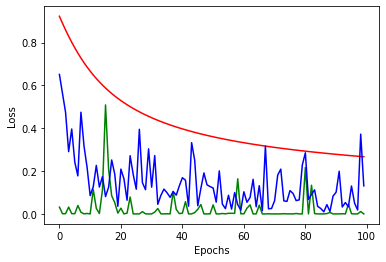

In [21]:
%matplotlib inline
plt.plot(range(100),objListG,'r')
plt.plot(range(100),objListS,'g')
plt.plot(range(100),objListM,'b')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# 5. Prediction
### Compare the training and testing accuracy for logistic regression and regularized logistic regression.

In [22]:
# Predict class label
# Inputs:
#     w: weights: d-by-1 matrix
#     X: data: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    predictions = np.matmul(X,w)
    for i in range(len(predictions)):
        # if sum of w1x1 + w2x2 + ... + wnxn is less than 0, make final prediction a flat -1 prediction (same for +1)
        if predictions[i] < 0:
            predictions[i] = -1
        else:
            predictions[i] = 1
    return predictions
def getAccuracy(predictions,labels):
    '''
    find the percent of predictions we got right according to the labels
    '''
    count = 0
    for i in range(len(predictions)):
        if predictions[i] == labels[i]:
            count+=1
    return count/len(predictions)

In [23]:
# evaluate training error of logistric regression and regularized version
print("TRAINING")
print()

predG = predict(optWeightsG,x_train)
accG = getAccuracy(predG,y_train)
print("Gradient Descent Accuracy:", accG)

predRG = predict(optWeightsRG,x_train)
accRG = getAccuracy(predRG,y_train)
print("Regularized Gradient Descent Accuracy:", accRG)

print()

predS = predict(optWeightsS,x_train)
accS = getAccuracy(predS,y_train)
print("Stochastic Gradient Descent Accuracy:", accS)

predRS = predict(optWeightsRS,x_train)
accRS = getAccuracy(predRS,y_train)
print("Regularized Stochastic Gradient Descent Accuracy:", accRS)

print()

predM = predict(optWeightsM,x_train)
accM = getAccuracy(predM,y_train)
print("Mini-Batch Gradient Descent Accuracy:", accM)

predRM = predict(optWeightsRM,x_train)
accRM = getAccuracy(predRM,y_train)
print("Regularized Mini-Batch Gradient Descent Accuracy:", accRM)

TRAINING

Gradient Descent Accuracy: 0.9560439560439561
Regularized Gradient Descent Accuracy: 0.9560439560439561

Stochastic Gradient Descent Accuracy: 0.989010989010989
Regularized Stochastic Gradient Descent Accuracy: 0.9802197802197802

Mini-Batch Gradient Descent Accuracy: 0.9802197802197802
Regularized Mini-Batch Gradient Descent Accuracy: 0.9604395604395605


In [24]:
# evaluate testing error of logistric regression and regularized version
print("TESTING")
print()

predGT = predict(optWeightsG,x_test)
accGT = getAccuracy(predGT,y_test)
print("Gradient Descent Accuracy:", accGT)

predRGT = predict(optWeightsRG,x_test)
accRGT = getAccuracy(predRGT,y_test)
print("Regularized Gradient Descent Accuracy:", accRGT)

print()

predST = predict(optWeightsS,x_test)
accST = getAccuracy(predST,y_test)
print("Stochastic Gradient Descent Accuracy:", accST)

predRST = predict(optWeightsRS,x_test)
accRST = getAccuracy(predRST,y_test)
print("Regularized Stochastic Gradient Descent Accuracy:", accRST)

print()

predMT = predict(optWeightsM,x_test)
accMT = getAccuracy(predMT,y_test)
print("Mini-Batch Gradient Descent Accuracy:", accMT)

predRMT = predict(optWeightsRM,x_test)
accRMT = getAccuracy(predRMT,y_test)
print("Regularized Mini-Batch Gradient Descent Accuracy:", accRMT)

TESTING

Gradient Descent Accuracy: 0.9210526315789473
Regularized Gradient Descent Accuracy: 0.9210526315789473

Stochastic Gradient Descent Accuracy: 0.9649122807017544
Regularized Stochastic Gradient Descent Accuracy: 0.956140350877193

Mini-Batch Gradient Descent Accuracy: 0.956140350877193
Regularized Mini-Batch Gradient Descent Accuracy: 0.9298245614035088


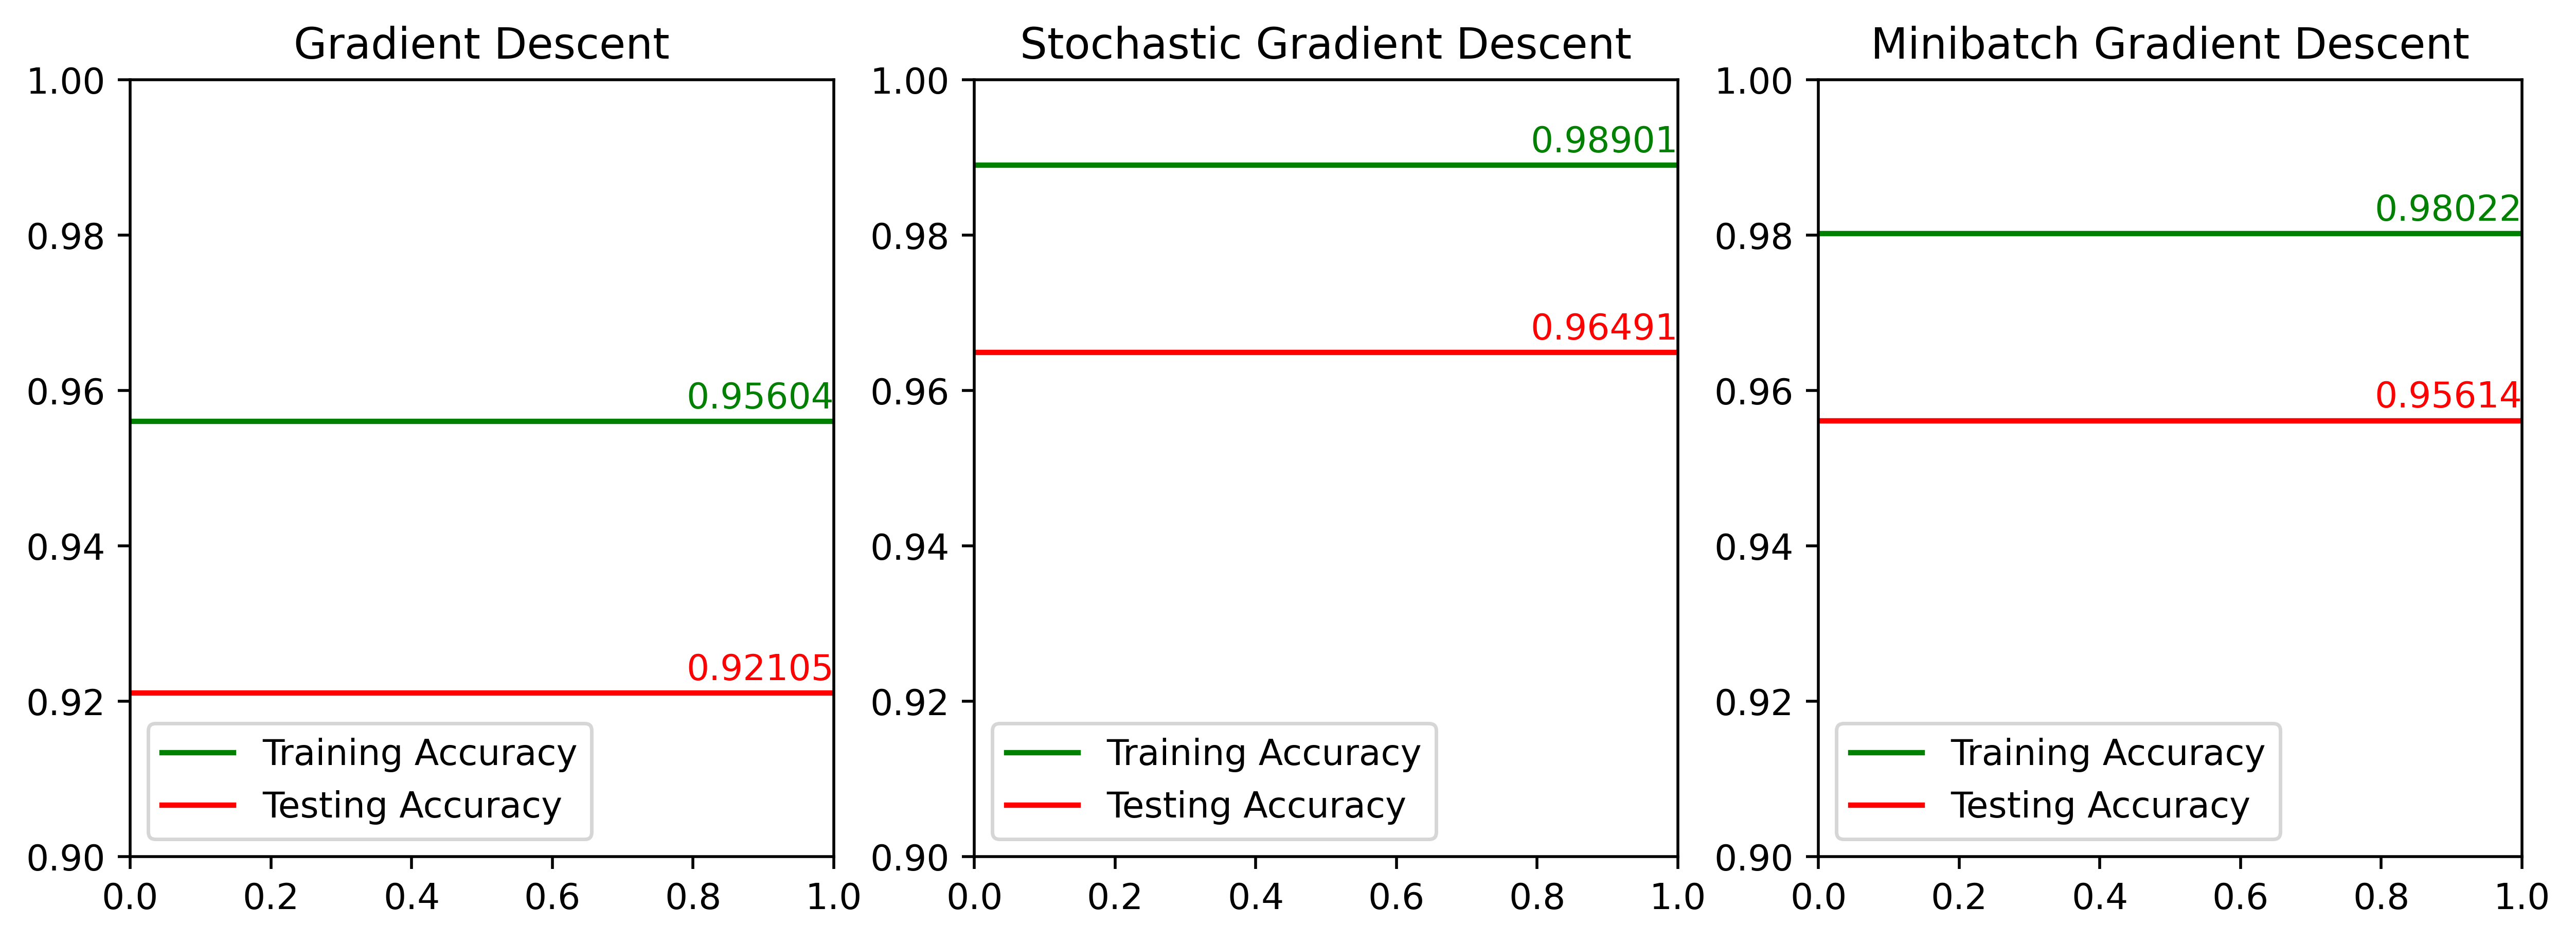

In [25]:
plt.figure(figsize=(12,4),dpi=500)
plt.subplot(1, 3, 1)
plt.title("Gradient Descent")
plt.axhline(y=accG, color = 'g', label="Training Accuracy")
plt.axhline(y=accGT, color = 'r', label="Testing Accuracy")
plt.text(1, accG+0.003, round(accG,5), color='g', ha="right", va="center")
plt.text(1, accGT+0.003, round(accGT,5), color='r', ha="right", va="center")
plt.ylim(0.9,1)
plt.legend(loc='lower left')

plt.subplot(1, 3, 2)
plt.title("Stochastic Gradient Descent")
plt.axhline(y=accS, color = 'g', label="Training Accuracy")
plt.axhline(y=accST, color = 'r', label="Testing Accuracy")
plt.text(1, accS+0.003, round(accS,5), color='g', ha="right", va="center")
plt.text(1, accST+0.003, round(accST,5), color='r', ha="right", va="center")
plt.ylim(0.9,1)
plt.legend(loc='lower left')

plt.subplot(1, 3, 3)
plt.title("Minibatch Gradient Descent")
plt.axhline(y=accM, color = 'g', label="Training Accuracy")
plt.axhline(y=accMT, color = 'r', label="Testing Accuracy")
plt.text(1, accM+0.003, round(accM,5), color='g', ha="right", va="center")
plt.text(1, accMT+0.003, round(accMT,5), color='r', ha="right", va="center")
plt.ylim(0.9,1)
plt.legend(loc='lower left')


plt.show()

Regularized Versions


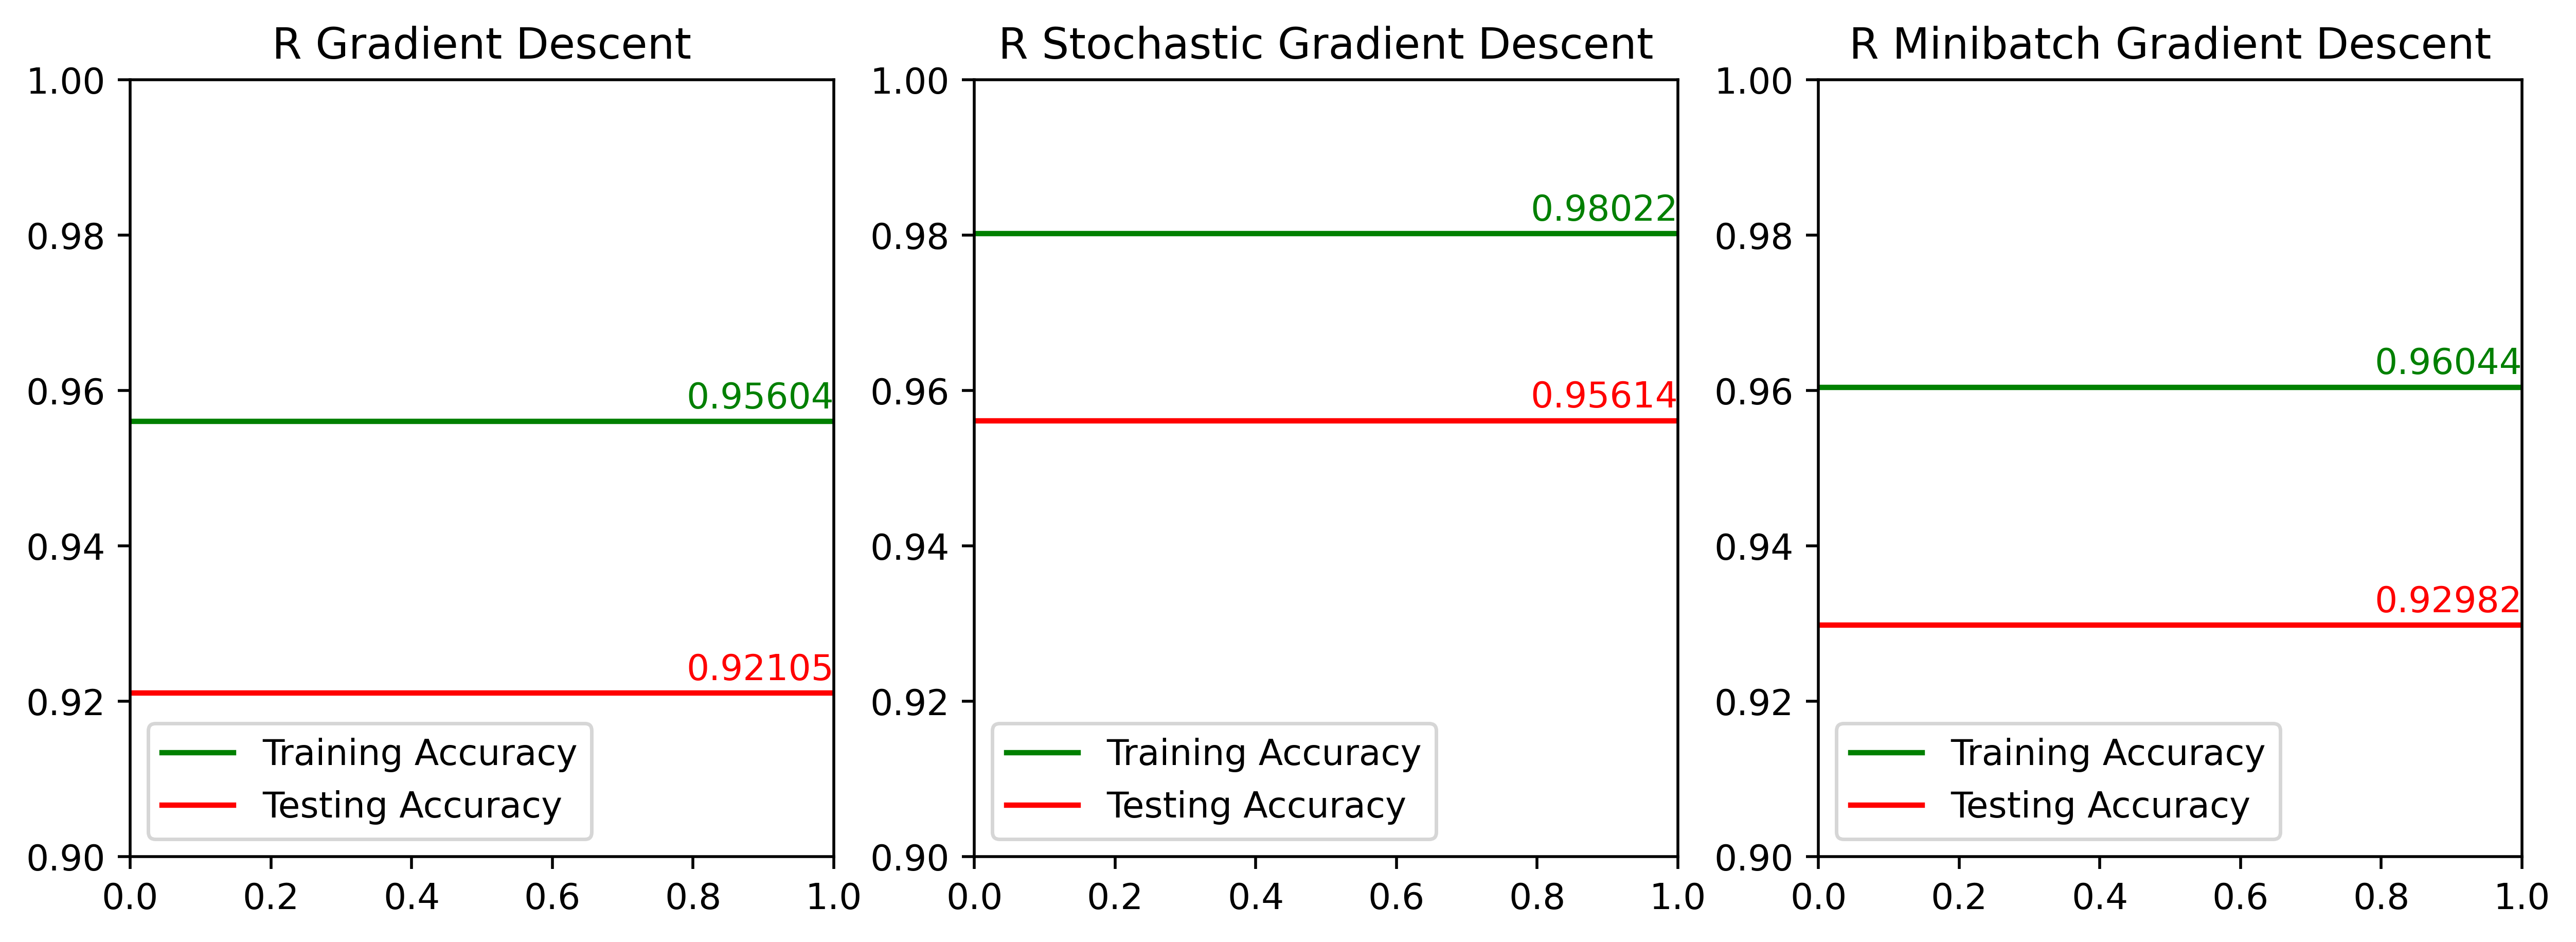

In [26]:
plt.figure(figsize=(12,4),dpi=500)
print("Regularized Versions")
plt.subplot(1, 3, 1)
plt.title("R Gradient Descent")
plt.axhline(y=accRG, color = 'g', label="Training Accuracy")
plt.axhline(y=accRGT, color = 'r', label="Testing Accuracy")
plt.text(1, accRG+0.003, round(accRG,5), color='g', ha="right", va="center")
plt.text(1, accRGT+0.003, round(accRGT,5), color='r', ha="right", va="center")
plt.ylim(0.9,1)
plt.legend(loc='lower left')

plt.subplot(1, 3, 2)
plt.title("R Stochastic Gradient Descent")
plt.axhline(y=accRS, color = 'g', label="Training Accuracy")
plt.axhline(y=accRST, color = 'r', label="Testing Accuracy")
plt.text(1, accRS+0.003, round(accRS,5), color='g', ha="right", va="center")
plt.text(1, accRST+0.003, round(accRST,5), color='r', ha="right", va="center")
plt.ylim(0.9,1)
plt.legend(loc='lower left')

plt.subplot(1, 3, 3)
plt.title("R Minibatch Gradient Descent")
plt.axhline(y=accRM, color = 'g', label="Training Accuracy")
plt.axhline(y=accRMT, color = 'r', label="Testing Accuracy")
plt.text(1, accRM+0.003, round(accRM,5), color='g', ha="right", va="center")
plt.text(1, accRMT+0.003, round(accRMT,5), color='r', ha="right", va="center")
plt.ylim(0.9,1)
plt.legend(loc='lower left')


plt.show()

# 6. Parameters tuning

### In this section, you may try different combinations of parameters (regularization value, learning rate, etc) to see their effects on the model. (Open ended question)

In [27]:
learning_rates = [0.01, 0.02, 0.03, 0.05]
regularization_values = [0, 0.1, 0.2, 0.25]

In [28]:
highest = 0
for l in learning_rates:
    for r in regularization_values:
        optWeights, objList = gradient_descent(x_train, y_train, r, l, w)
        pred = predict(optWeights,x_test)
        acc = getAccuracy(pred,y_test)
        print("GD Acc:", acc)
        if(acc > highest):
            highest = acc
            print("New Best!","L:", l,"R:",r)

GD Acc: 0.9210526315789473
New Best! L: 0.01 R: 0
GD Acc: 0.9210526315789473
GD Acc: 0.9210526315789473
GD Acc: 0.9210526315789473
GD Acc: 0.9385964912280702
New Best! L: 0.02 R: 0
GD Acc: 0.9385964912280702
GD Acc: 0.9385964912280702
GD Acc: 0.9385964912280702
GD Acc: 0.9385964912280702
GD Acc: 0.9385964912280702
GD Acc: 0.9473684210526315
New Best! L: 0.03 R: 0.2
GD Acc: 0.9473684210526315
GD Acc: 0.9385964912280702
GD Acc: 0.9385964912280702
GD Acc: 0.9385964912280702
GD Acc: 0.9385964912280702


In [29]:
highest = 0
for l in learning_rates:
    for r in regularization_values:
        optWeights, objList = sgd(x_train, y_train, r, l, w)
        pred = predict(optWeights, x_test)
        acc = getAccuracy(pred, y_test)
        print("SGD Acc:", acc)
        if(acc > highest):
            highest = acc
            print("New Best!","L:", l,"R:",r)

SGD Acc: 0.9649122807017544
New Best! L: 0.01 R: 0
SGD Acc: 0.9473684210526315
SGD Acc: 0.9385964912280702
SGD Acc: 0.9385964912280702
SGD Acc: 0.9649122807017544
SGD Acc: 0.9473684210526315
SGD Acc: 0.9473684210526315
SGD Acc: 0.9649122807017544
SGD Acc: 0.9649122807017544
SGD Acc: 0.9473684210526315
SGD Acc: 0.9298245614035088
SGD Acc: 0.9385964912280702
SGD Acc: 0.9649122807017544
SGD Acc: 0.9473684210526315
SGD Acc: 0.9385964912280702
SGD Acc: 0.9385964912280702


In [30]:
highest = 0
for l in learning_rates:
    for r in regularization_values:
        optWeights, objList = mbgd(x_train, y_train, r, l, w)
        pred = predict(optWeights, x_test)
        acc = getAccuracy(pred, y_test)
        print("MBGD Acc:", acc)
        if(acc > highest):
            highest = acc
            print("New Best!","L:", l,"R:",r)

MBGD Acc: 0.956140350877193
New Best! L: 0.01 R: 0
MBGD Acc: 0.9473684210526315
MBGD Acc: 0.9385964912280702
MBGD Acc: 0.9473684210526315
MBGD Acc: 0.9473684210526315
MBGD Acc: 0.9473684210526315
MBGD Acc: 0.9385964912280702
MBGD Acc: 0.9385964912280702
MBGD Acc: 0.956140350877193
MBGD Acc: 0.9473684210526315
MBGD Acc: 0.9385964912280702
MBGD Acc: 0.9473684210526315
MBGD Acc: 0.956140350877193
MBGD Acc: 0.9473684210526315
MBGD Acc: 0.9385964912280702
MBGD Acc: 0.9473684210526315


## Q5 Complete